## Deep Learning Applied to Images - Object Detection

#### Prof. Thomas da Silva Paula

### Faster R-CNN demo

* Using Faster R-CNN with ResNet 101 backbone, trained on MSCOCO, from Tensorflow Object Detection API (https://github.com/tensorflow/models/tree/master/research/object_detection)
* Simplified version of original Tensorflow demonstration

### Imports

In [1]:
import cv2
import json
import pprint

import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches


plt.rcParams['figure.figsize'] = [14, 10]

In [2]:
tf.__version__

'2.3.1'

### Useful methods

In [3]:
def read_img(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def image_to_nparray(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

def load_coco_dict(labels_path):
    with open(labels_path, 'r') as f:
        coco_labels = json.load(f)

    labels_dict = {}
    for info in coco_labels['labels']:
        labels_dict[info['id']] = info['label']
        
    return labels_dict

### Loading trained model and COCO labels

In [4]:
model_checkpoint = 'trained_models/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/'
labels_path = 'coco_labels.txt'

In [5]:
%%time
model = tf.saved_model.load(model_checkpoint)
model

Wall time: 20.3 s


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x2018a72b048>

In [6]:
labels_dict = load_coco_dict(labels_path)

In [7]:
print(labels_dict[2])

bicycle


### Inspecting image

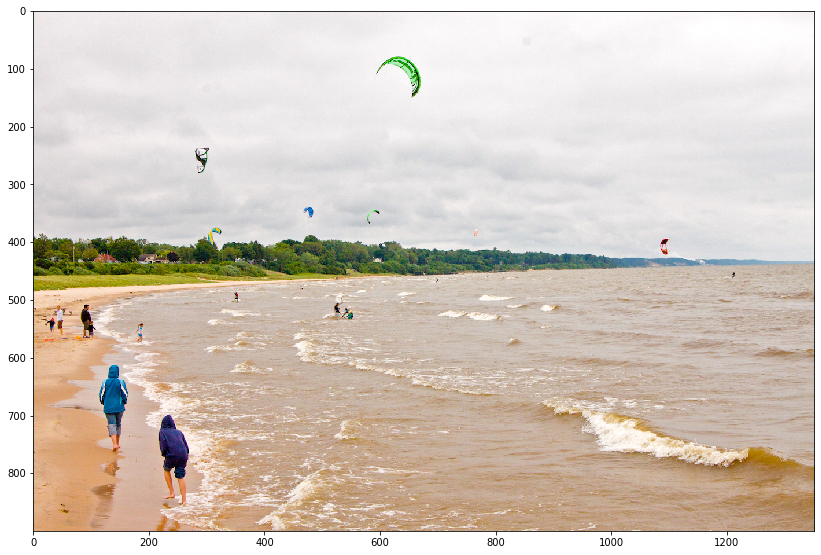

In [8]:
img_path = 'sample_images/beach.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

### Running inference

In [9]:
%%time
img = read_img(img_path)
img = cv2.resize(img, (1024, 1024))
img = np.asarray(img, dtype='float32')
img = np.expand_dims(img, axis=0)
output_dict = model(img)

Wall time: 8.5 s


In [13]:
for k in output_dict.keys():
    print(k)

raw_detection_scores
detection_boxes
detection_multiclass_scores
detection_scores
raw_detection_boxes
num_detections
detection_anchor_indices
detection_classes


In [10]:
pprint.pprint(output_dict)

{'detection_anchor_indices': <tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[  0.,   8.,  13.,   9.,   2.,  12.,  11.,   3.,  14.,  31.,  18.,
         17.,  25.,   1.,  20.,  79.,  22.,   6.,  24.,  15.,  60.,  92.,
        200.,  38., 154., 179.,  42.,  41., 231.,  87., 286., 149.,  46.,
        298.,  26., 116.,  86.,  19.,  30., 228., 218., 185.,  59.,  72.,
        207.,  90.,  45., 105., 155., 112.,  50.,   7., 104.,   1., 232.,
        249., 239., 270.,  41.,   7.,  80.,  71.,  26., 205.,  92.,  47.,
        171., 261., 145., 288., 115.,  90., 122.,  27., 150., 107., 109.,
        165., 234.,  55., 121., 290., 256.,  30.,  59.,  72., 138., 250.,
         86., 243., 257.,  41., 296.,  37., 135., 187., 135., 150., 225.,
         41., 239., 277.,   1., 141., 182., 220., 275., 228., 126., 122.,
         22., 299., 101.,  51., 230., 283.,  96., 241., 107., 247., 141.,
        124., 104., 255.,  49., 155., 212., 171., 191., 214., 248.,  30.,
         96.,  84., 169.,  71., 2

### Plot detections
Using the `confidence_threshold`

kite
person
kite
person
person
kite
kite
person
person
person
person
kite


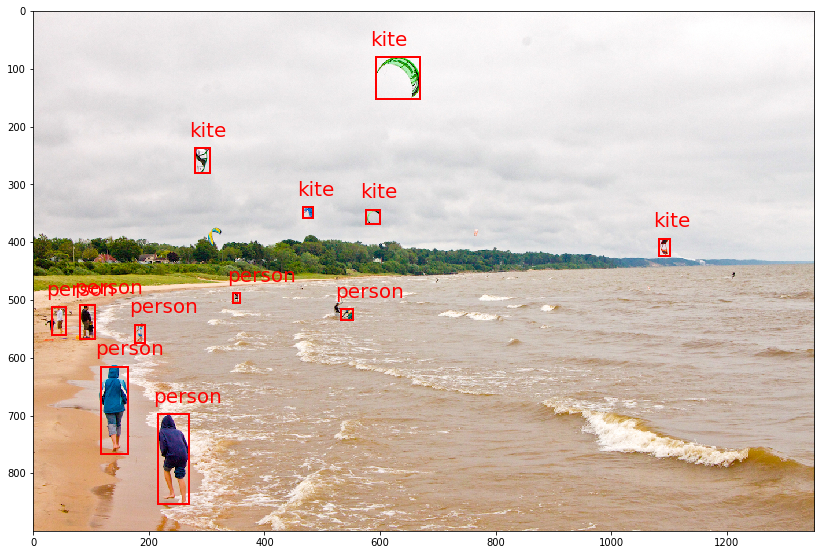

In [17]:
fig, ax = plt.subplots(1)
img = read_img(img_path)
confidence_threshold = .8

for boxes, score, cls_id in zip(output_dict['detection_boxes'][0],
                                output_dict['detection_scores'][0],
                                output_dict['detection_classes'][0]):
    ymin, xmin, ymax, xmax = boxes
    if score > confidence_threshold:
        (left, right, top, bottom) = (xmin * width, xmax * width,
                                      ymin * height, ymax * height)
        rect = patches.Rectangle((left, top),
                                 right-left,
                                 bottom-top,
                                 linewidth=2, edgecolor='r',
                                 facecolor='none')
        ax.add_patch(rect)
        plt.text(left-10, top-20, labels_dict[cls_id.numpy()], fontsize=20, color='r')
        print(labels_dict[cls_id.numpy()])
ax.imshow(img)

### Testing with other images

In [18]:
def predict_and_plot(img_path, width, height, confidence_threshold=.8):
    img = read_img(img_path)
    img = cv2.resize(img, (1024, 1024))
    img = np.asarray(img, dtype='float32')
    img = np.expand_dims(img, axis=0)
    
    output_dict = model(img)
    
    fig, ax = plt.subplots(1)
    img = read_img(img_path)

    for boxes, score, cls_id in zip(output_dict['detection_boxes'][0],
                                    output_dict['detection_scores'][0],
                                    output_dict['detection_classes'][0]):
        ymin, xmin, ymax, xmax = boxes
        if score > confidence_threshold:
            (left, right, top, bottom) = (xmin * width, xmax * width,
                                          ymin * height, ymax * height)
            rect = patches.Rectangle((left, top),
                                     right-left,
                                     bottom-top,
                                     linewidth=2, edgecolor='r',
                                     facecolor='none')
            ax.add_patch(rect)
            plt.text(left-10, top-20, labels_dict[cls_id.numpy()], fontsize=20, color='r')
            print(labels_dict[cls_id.numpy()])
    ax.imshow(img)

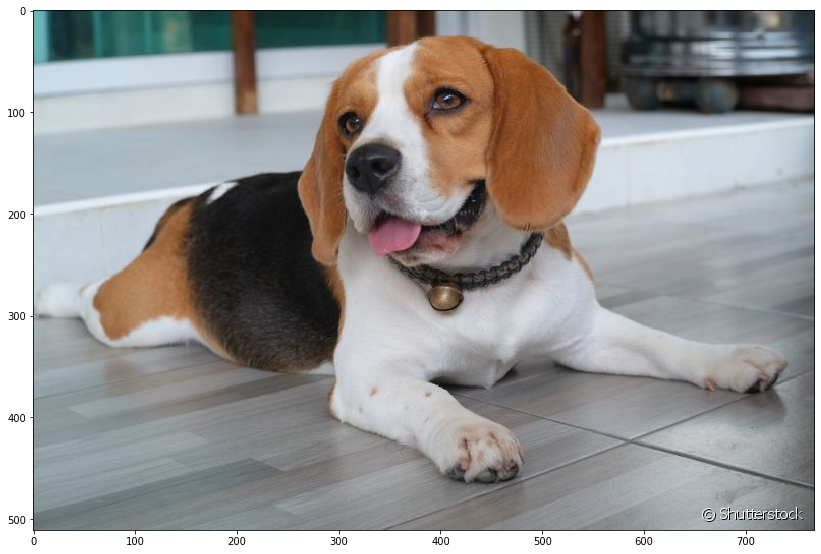

In [19]:
img_path = 'sample_images/dog2.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

dog


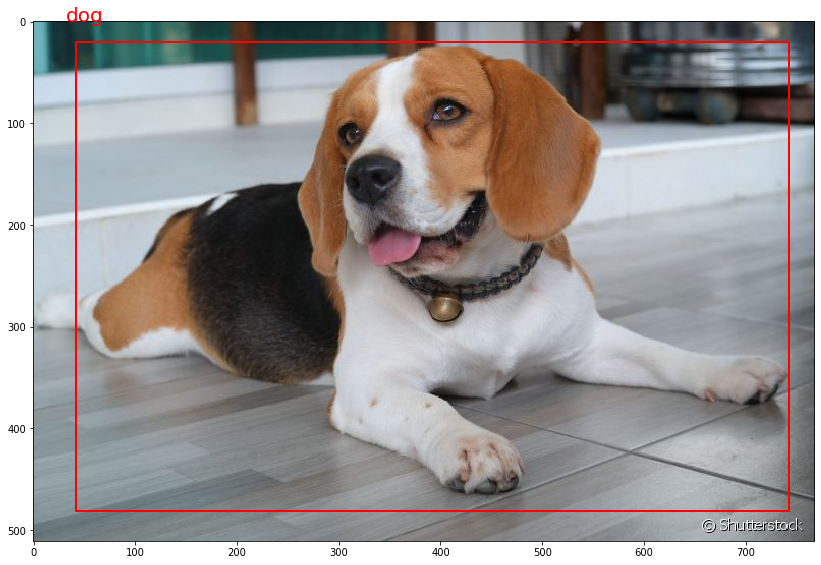

In [20]:
predict_and_plot(img_path, width, height)

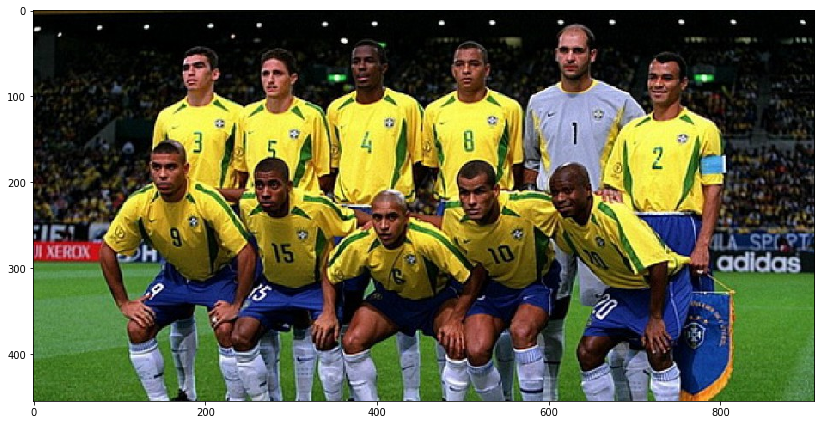

In [21]:
img_path = 'sample_images/soccer.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

person
person
person
person
person
person
person
person
person
person
person


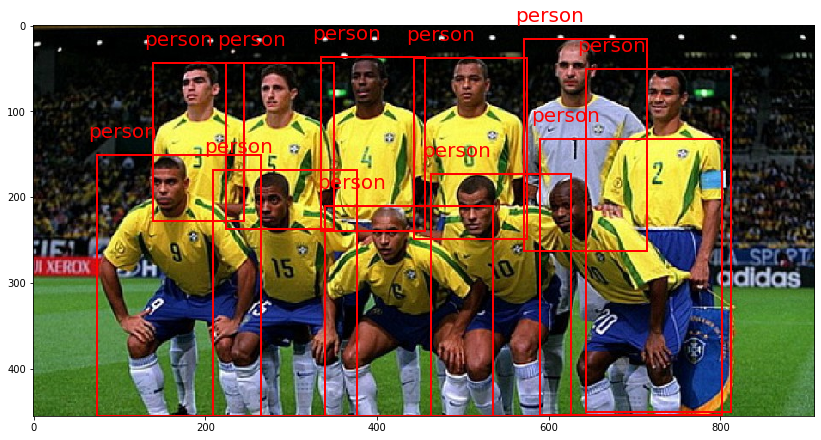

In [24]:
predict_and_plot(img_path, width, height, confidence_threshold=.4)

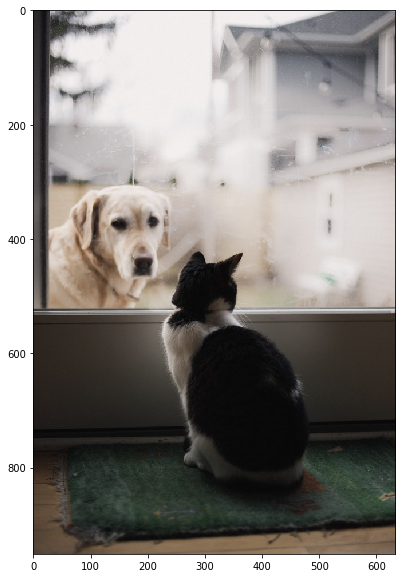

In [25]:
img_path = 'sample_images/cat_dog.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

cat
dog


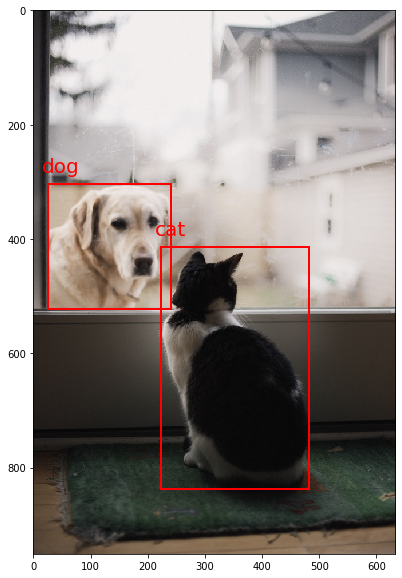

In [26]:
predict_and_plot(img_path, width, height, confidence_threshold=.8)